**Principal Component Analysis for Handwritten recognition**

The Principal Component Analysis is a bases transformation tehcniques which allows to find an orthogonal set of bases with the most variation of a system.

Lets say we have the orthornal bases $\{x_1,x_2\}$ with a dataset X=$\{X_1,X_2\}$ as showed in the figure bellow.
If there is some correlation between variable $x_1$ and $x_2$ then, there exist a linear transfortion which can rotate the coordianates to find the direction  with the most data variation.

$$ Z=TX $$

Where $X$ is the original dataset with $\{x_1,x_2\}$, $T$ is a linear rotation and $Z$ is dataset based on the new bases $\{z_1,z_2\}$.


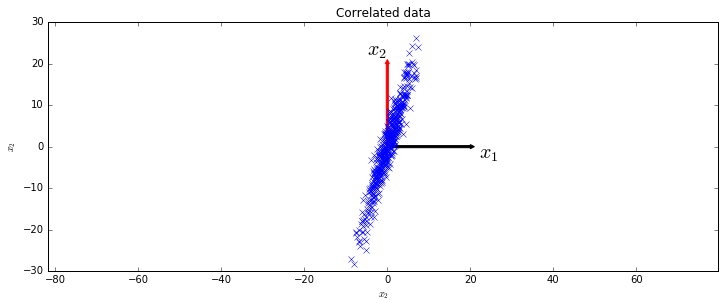

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Setting mean and standard deviation
mean = [0, 0]
cov = [[10, 30], [30, 100]]  # diagonal covariance 

nsp = 500 # number of samples points

x, y = np.random.multivariate_normal(mean, cov, nsp).T 

#plotting data
f, (ax1) = plt.subplots(1,1,figsize=(10,4),dpi= 80)
f.tight_layout()
plt.subplots_adjust(hspace = 0.3, wspace = 0.5)

ax1.plot(x, y, 'x')
ax1.axis('equal')

#plotting base vector
w = 0.5
l = 20

ax1.arrow(0,0,l,0,width=w,head_width=2*w,head_length=1,color = 'k')
ax1.arrow(0,0,0,l,width=w,head_width=2*w,head_length=1,color = 'r')
ax1.text(l+2, -3, r'$x_1$', fontsize=20)
ax1.text(-5, l+2, r'$x_2$', fontsize=20)
ax1.set_ylabel('$x_2$')  
ax1.set_xlabel('$x_2$')  
ax1.set_title('Correlated data') 


The $T$ linear operator can be found bases on a eigen decomposition on the correlation matrix $X^TX$:

$$ X^TX = T{\Lambda}T^T$$

Where ${\Lambda}$ is the a diagonal matriz with the eigenvalues and T is the eigenvector matrix. The trace of $ X^TX$ is equal to the trace of ${\Lambda}$, which means the total variance of the system was preserved. The highest eigenvalues are associente with the directios (eigenvector) with the most variation of the system.  

500 2


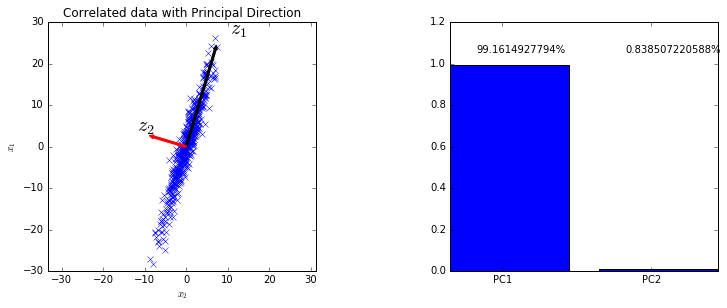

In [74]:
def PCA(M):
    Mt = np.transpose(M)     
    MtM = np.matmul(M,Mt)
    #MtM = np.cov(Mt)
    #print("Shape of MtM =", np.shape(MtM))
    
    # Eigenvalue decomposition
    w,T = np.linalg.eigh(MtM)

 
    # sorting PCA
    id = w.argsort()[::-1]      
    w = w[id]
    W = np.diag(w)
    T = T[:,id]
    Tt= np.transpose(T)
    
    Z = np.matmul(M.T,T)
    return Z, T, W

M = np.array([x,y])

Z, T , W = PCA(M)

#plotting data
f, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),dpi= 80)
f.tight_layout()
plt.subplots_adjust(hspace = 0.3, wspace = 0.5)

ax1.plot(x, y, 'x',zorder=1)
ax1.axis('equal')

#plotting base vector
w = 0.5 # arrow width
s1 = 0.0005 # scale for pca 1
s2 = 0.02 # scale for pca 2
l1 = s1*W[0,0]
l2 = s2*W[1,1]
dt = 0.5 # distance to translate label

ax1.arrow(0,0,l1*T[0,0],l1*T[1,0],width=w,head_width=2*w,head_length=1,color = 'k',zorder=2)
ax1.arrow(0,0,l2*T[0,1],l2*T[1,1],width=w,head_width=2*w,head_length=1,color = 'r',zorder=3)
ax1.text(l1*T[0,0]+dt*l1*T[0,0],l1*T[1,0]+dt*l1*T[0,0], r'$z_1$', fontsize=20)
ax1.text(l2*T[0,1]+dt*l2*T[0,1],l2*T[1,1]+dt*l2*T[1,1], r'$z_2$', fontsize=20)
ax1.set_ylabel('$x_1$')  
ax1.set_xlabel('$x_2$')  
ax1.set_title('Correlated data with Principal Direction') 

totalVar = np.trace(W) # total variation
var1 = W[0,0]/totalVar # percetage of the variation in z1 direction
var2 = W[1,1]/totalVar # percetage of the variation in z2 direction

nvariable, nsamples = M.shape
print(nsamples, nvariable)
width = 0.35
ind = np.array([1,2])
ax2.bar(ind,[var1,var2])
ax2.set_xticklabels(('PC1', 'PC2'))
ax2.set_xticks(ind + width )
ax2.set_ylim(ymax = 1.20, ymin = 0)

ax2.text(1 + width/2, 1.05, str(var1*100) + "%")
ax2.text(2 + width/2, 1.05, str(var2*100) + "%")

It is possible to noticed that the $z_1$ direction represents $99.22\%$ of the total variation on the data. Then, PCA can be seen as a dimentional reduction transformation since we can project the dataset X into only the $z_1$ axis.

$$PCA: R^n \to R^m$$

Where $m<n$

**PCA as a Dimentional Reduction Operator for Handwritten recognition**

A human been can identify handwritten numbers written by different people because they are very correlated.
See the number shown below:


<function __main__.plotnumber>

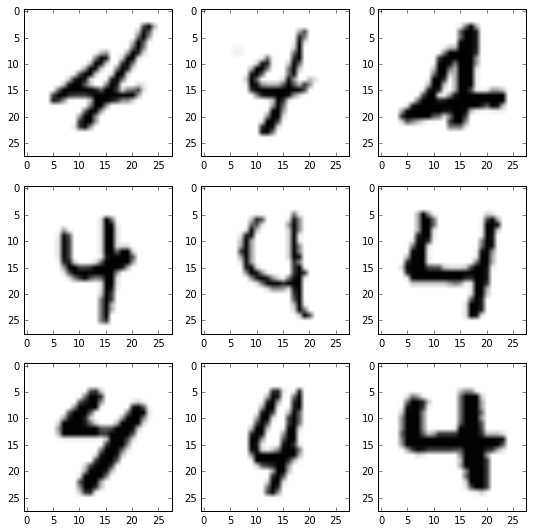

In [4]:
import sys, os
from ipywidgets import widgets
from ipywidgets import *

# this is a subset (10000 samples) of the handwritten database in find in the website:
# http://yann.lecun.com/exdb/mnist/
# importing database
databasepath = r'D:\treinamento\UGM\UGM2017\PythonCodes\handwritten\datebase'
X = np.load(os.path.join(databasepath,'database.npy'))
label = np.load(os.path.join(databasepath,'label.npy'))


def plotnumber(getnumber):
    ''' This function search in the database handwritten numbers equal to the
    integer passed to the function.
    inputs:
    getnumber = int number among 0 and 9
    
    outputs:
    handwritten imagens
    
    '''
    getindex = []
    maxnumber = 9
    for j,i in enumerate(label):
        if len(getindex)==maxnumber:
            break
        else:
            if i==int(getnumber):
                getindex.append(j)    
      

    f, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(9,9),dpi= 80)


    im = X[getindex]
    ax1.imshow(im[0], cmap="Greys")
    ax2.imshow(im[1], cmap="Greys")
    ax3.imshow(im[2], cmap="Greys")
    ax4.imshow(im[3], cmap="Greys")
    ax5.imshow(im[4], cmap="Greys")
    ax6.imshow(im[5], cmap="Greys")
    ax7.imshow(im[6], cmap="Greys")
    ax8.imshow(im[7], cmap="Greys")
    ax9.imshow(im[8], cmap="Greys")


interact(plotnumber,  getnumber = (0,9,1))
#plotnumber(getnumber)

Each imagine showed above is discrebed by 28 by 28 pixels, which are the input bases of the image $\{p_{11},p_{12},...,p_{21},p_{22},...,...,p_{2828}\}$. The bases is usually presented in matrix notation:

$$x = \left[ \begin{array}{cccc}
p_{11} & p_{12} & ... & p_{128} \\
p_{21} & p_{22} & ... & p_{228} \\
p_{281} & p_{282} & ... & p_{2828} \\ \end{array} \right]$$


Where $x$ is a generic image. Another way to represent the image is creating a vector using the column space.

$$x = \left[ \begin{array}{cccc}
p_{11} \\
p_{12} \\
...   \\
p_{21} \\
p_{22} \\
 ...   \\
p_{2828} \\ 
p_{2829} \\ \end{array} \right]$$

There are 784 independes variables. If the database is correlated, it is possible to discrebe each handwritten number with smaller number of bases, which is a rotation of the original bases $\{p_{11},p_{12},...,p_{21},p_{22},...,...,p_{2828}\}$. Then, PCA can be applied to find another orthogonal set bases can discribe the most information of the image. The images above shown the new image bases (eigevector) of this given database. The eigenvalue also are shown order to see how many Principal Components are need to descrebe this problem.

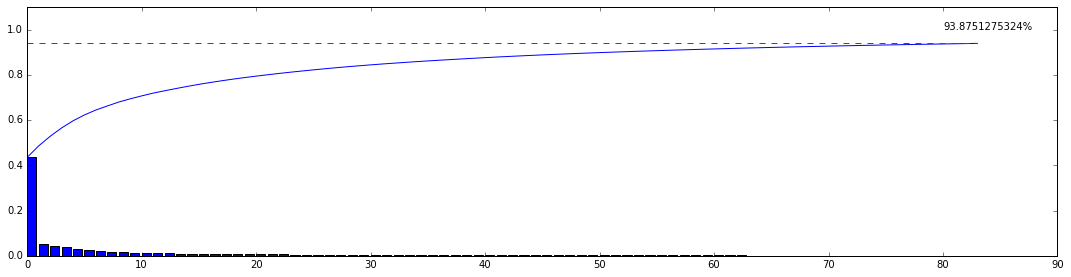

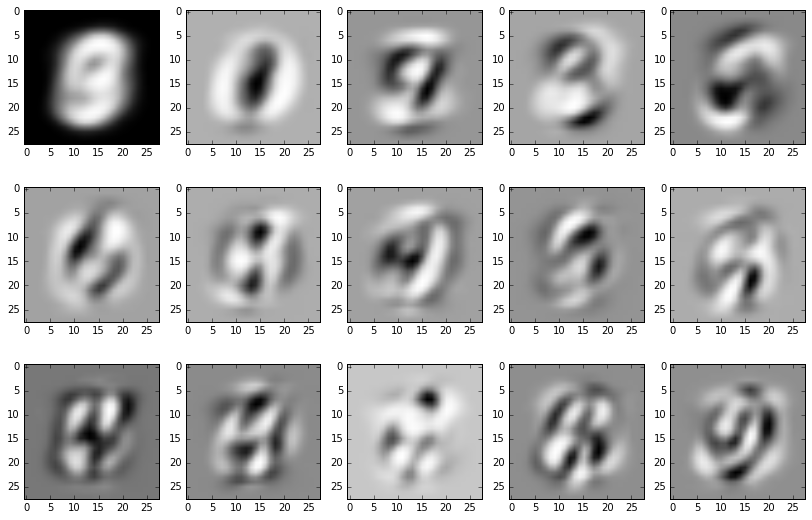

In [58]:
Z = np.load(os.path.join(databasepath,'Z.npy'))
T = np.load(os.path.join(databasepath,'T.npy'))
W = np.load(os.path.join(databasepath,'W.npy'))


nsamples, nvariable = Z.shape


totalVar = np.trace(W) # total variation

nvariable = nvariable - 700
var=np.zeros(nvariable)
cumsum = np.zeros(nvariable)

for i in range(nvariable):
    var[i] = W[i,i]/totalVar # percetage of the variation in z1 direction
    if i>0:
        cumsum[i] = var[i] + cumsum[i-1]
    else:
        cumsum[i] = var[i]

#plotting data
f, (ax1) = plt.subplots(1,1,figsize=(15,4),dpi= 80)
f.tight_layout()
plt.subplots_adjust(hspace = 0.3, wspace = 0.5)


width = 0.35


ax1.bar(range(nvariable),var)
ax1.plot(range(nvariable),cumsum)
ax1.plot(range(nvariable),[cumsum[-1]]*len(cumsum),'r--')
ax1.set_ylim(ymax = 1.10, ymin = 0)
ax1.text(80, 1.0, str(cumsum[-1]*100) + "%")


def im2vec(im):
    nc, nr = np.shape(im)
    vi = np.zeros(nc*nc)
    for i in range(nc): 
        vi[i*nc:(i+1)*nc] = im[i][:]
    return vi       

def vec2im(v,nx):    
    im = np.zeros([nx,nx])  
    for j in range(nx):  
        im[j,:] = v[j*nx:(j+1)*nx]
    return im   

pix = 28 # pixels in x direction



fig, ((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15)) = plt.subplots(3,5,figsize=(14,9),dpi= 80)
ZIM = [] # list with principal images
npi = 15 # number of images
for i in range(npi):
    ZIM.append(vec2im(T[:,i],pix))
    strplot = "ax" + str(i+1) + '.imshow(ZIM[' + str(i) + '], cmap="Greys")'
    exec(strplot)
    

After the PCA, it is possible to rebuild the images based on the a linear combination of the "eigenimages".
See below where you can interact with the images and select the number of principal components. The higher the number o Principal Components the built images are more accurated.

<function __main__.<lambda>>

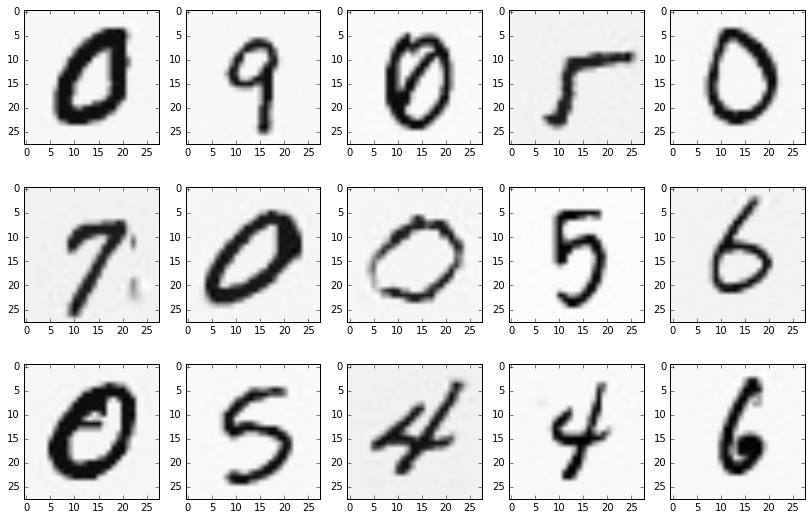

In [70]:
def PCArebuild(npc,Z,T,n):
    ''' inputs
        npc = 55  number of principal components
        Z = The project space
        T = The projection linear operator
        n = number of images to rebuild in database
        
        output
        plot images based on pca
    '''

    Imb = np.matmul(Z[:,0:npc],T[:,0:npc].T).T
    #print("Shape of Imb =", np.shape(Imb))
    
    fig, ((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15)) = plt.subplots(3,5,figsize=(14,9),dpi= 80)
    rim = [] # rebuilding image
    for i in range(n):
        rim.append(vec2im(Imb[:,i],pix))
        strplot = "ax" + str(i+1) + '.imshow(rim[' + str(i) + '], cmap="Greys")'
        exec(strplot)        
                   
    return None


#rim = PCArebuild(20,Z,T,15)

# build a function that depends on only npc
rebuildimg = lambda npc: PCArebuild(npc,Z,T,15)

interact(rebuildimg,  npc = (1,728,1))